Fake news detection

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/Ravi/AI lab/Homework/WELFake_Dataset.csv")
# (0 = fake and 1 = real)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.drop(columns=['Unnamed: 0'], axis = 1 ,inplace = True)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [7]:
# replacing missing values with spaces
df.fillna(' ', inplace = True)

In [8]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

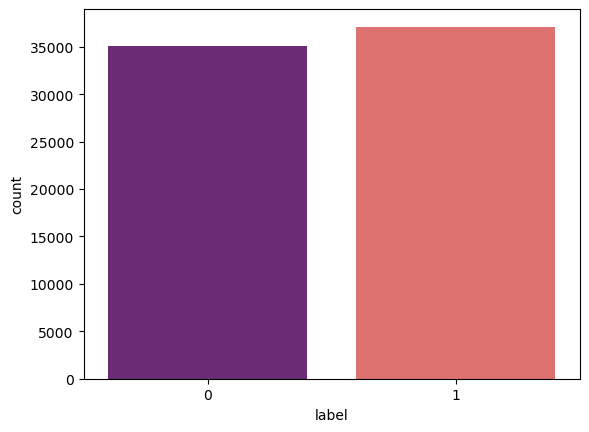

In [9]:
sns.countplot(x = 'label', data = df,palette = 'magma')
plt.show()

In [10]:
portStemmer=PorterStemmer()

In [11]:
def stemming(content):
    content = str(content)
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portStemmer.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
# stemming the title column
df['title']=df['title'].apply(stemming)

In [13]:
df['title'].head(5)

0    law enforc high alert follow threat cop white ...
1                                                     
2    unbeliev obama attorney gener say charlott rio...
3    bobbi jindal rais hindu use stori christian co...
4    satan russia unv imag terrifi new supernuk wes...
Name: title, dtype: object

In [14]:
df.drop(columns=('text'),inplace=True)

In [15]:
df.head()

,title,label
0,law enforc high alert follow threat cop white ...,1
1,,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1


In [16]:
X=df['title'].values
y=df['label'].values

Term Frequency (TF) measures how frequently a term appears in a document. It is calculated as:

TF = (Number of times the term appears in the document) / (Total number of terms in the document)

Inverse Document Frequency (IDF) measures how important a term is. It is calculated as:

IDF = log((Total number of documents) / (Number of documents containing the term))

The TF-IDF score is the product of TF and IDF:

TF-IDF = TF * IDF

In [17]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [18]:
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [19]:
print(X)

  (0, 407)	0.3190180925014663
  (0, 1802)	0.33473541566384035
  (0, 3679)	0.24871262252022117
  (0, 5509)	0.31820565801047196
  (0, 6425)	0.28932771754845743
  (0, 6730)	0.48553136502134386
  (0, 7887)	0.26746434949988324
  (0, 9699)	0.22829788917209384
  (0, 17260)	0.24871262252022117
  (0, 17363)	0.2542650376115143
  (0, 18648)	0.1297506867782943
  (0, 19106)	0.19134939529376566
  (2, 1049)	0.28404017886581956
  (2, 2673)	0.30809679188606154
  (2, 2919)	0.3639616996972358
  (2, 6880)	0.2652283770602196
  (2, 8020)	0.2692285294185893
  (2, 11864)	0.2231406266784195
  (2, 12011)	0.16878852994653004
  (2, 12744)	0.27904818164471595
  (2, 13591)	0.22687620695463123
  (2, 14591)	0.3580030298678158
  (2, 15094)	0.1609967301122813
  (2, 16446)	0.1999703023632961
  (2, 18034)	0.35962437110547785
  :	:
  (72130, 17778)	0.13227219506940732
  (72130, 18936)	0.25302499393443006
  (72131, 2566)	0.3967249021272091
  (72131, 8206)	0.46269177743112333
  (72131, 9752)	0.3384827653769501
  (72131, 109

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8952658210300132

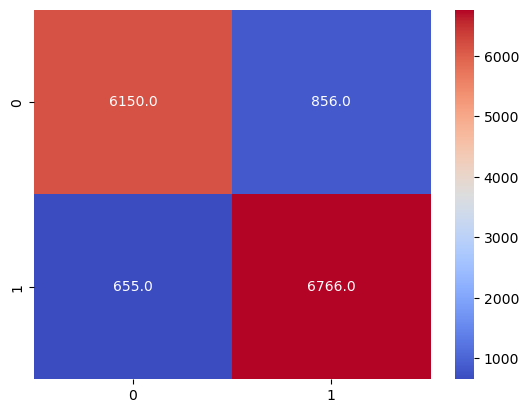

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'coolwarm',fmt = '.1f')
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7006
           1       0.89      0.91      0.90      7421

    accuracy                           0.90     14427
   macro avg       0.90      0.89      0.90     14427
weighted avg       0.90      0.90      0.90     14427



In [25]:
# Saving the lr as a .pkl file
model_filename = f"model_{type(lr).__name__}.pkl"  # Defining the filename for saving
with open(model_filename, 'wb') as file:
    pickle.dump(lr, file)  # Serializing the lr object
    print(f"Model {type(lr).__name__} saved as {model_filename}")  # Confirming that the lr model has been saved

Model LogisticRegression saved as model_LogisticRegression.pkl


In [26]:
X_new=X_test[45]
prediction=lr.predict(X_new)
print(prediction)

if (prediction==0):
    print('The news is fake')
else:
    print('The news is real')

[0]
The news is fake
